# SETUP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


In [3]:
file_path = "./data/Housing.csv"
df = pd.read_csv(file_path)

# Thống kê và phân tích dữ liệu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

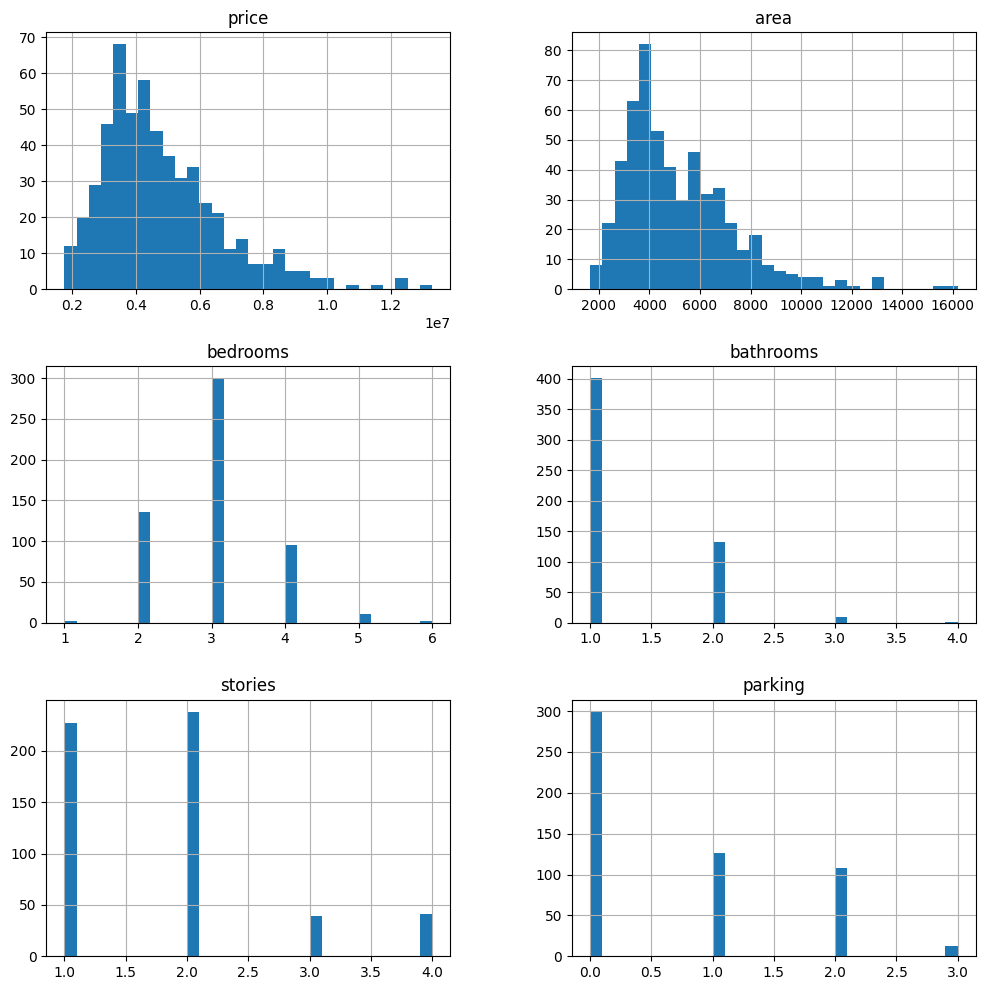

In [ ]:
df.hist(figsize=(12,12),bins= 30)

# Kiểm tra sự tương quan giữa của các trường để xác định giá trị độc lập và giá trị phụ thuộc

<Axes: >

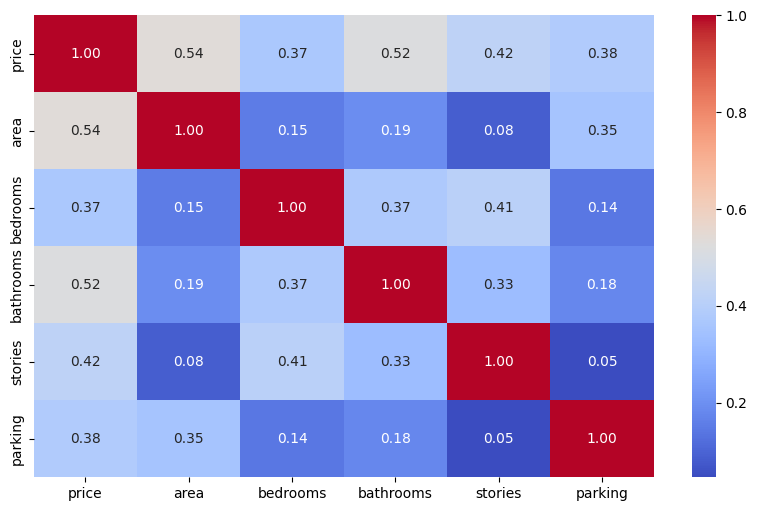

In [ ]:
df_copy = df
df_copy = df_copy.select_dtypes(include=[np.number])
plt.figure(figsize = (10,6))
sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Làm sạch dữ liệu

1. Kiểm tra có giá trị trống/null hay có giá trị thiếu không

In [ ]:
#giá trị ngoại lai(bất thường) - trống/null - giá trị ko phù hợp
def missing_values_table(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if len(missing_values) == 0:
        print("Không có giá trị thiếu trong dữ liệu.")
    else:
        print("\nGiá trị thiếu trong dữ liệu:")
        print(missing_values)
def already_exists_value(df):
  duplicate_values = df[df.duplicated()]
  if (len(duplicate_values) == 0):
    print("Không có giá trị trùng trong dữ liệu")
  else:
    print("\n Giá trị trùng trong dữ liệu")
    print(duplicate_values)
missing_values_table(df)
already_exists_value(df)


Không có giá trị thiếu trong dữ liệu.

 Giá trị trùng trong dữ liệu
       price  area  bedrooms  bathrooms  stories  parking  gia_moi_met_vuong  \
347  3675000  3630         2          1        1        0        1012.396694   

     gia_moi_phong_ngu  gia_moi_phong_tắm  gia_moi_phong_tang  \
347          1837500.0          3675000.0           3675000.0   

     gia_moi_khu_do_xe  phong_tang  dien_tich_tung_phong  
347                0.0         3.0                1210.0  


In [ ]:
df = df.drop_duplicates(keep='first')


In [ ]:
#Xử lý giá trị ngoại lai
Q1 = np.percentile(df["price"],25)
Q3 = np.percentile(df["price"],75)
IQR = Q3 - Q1
vung_bien_am = Q1 - 1.5*IQR
vung_bien_duong = Q3 + 1.5*IQR


GTNL = df[(df["price"] < vung_bien_am) | (df["price"] >vung_bien_duong)]
print(GTNL)
df = df.loc[(df["price"] >= vung_bien_am) & (df["price"]  <= vung_bien_duong)]

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, parking, gia_moi_met_vuong, gia_moi_phong_ngu, gia_moi_phong_tắm, gia_moi_phong_tang, gia_moi_khu_do_xe, phong_tang, dien_tich_tung_phong]
Index: []


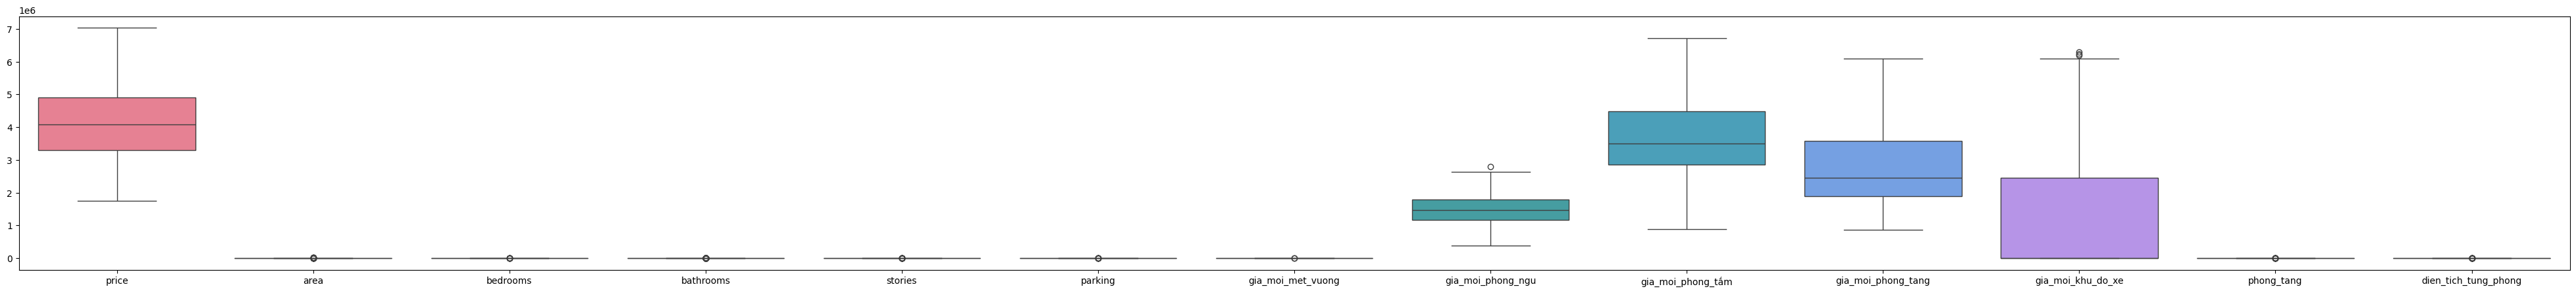

In [ ]:
#Kiểm tra thông qua biểu đồ
plt.figure(figsize=(50,5))
sns.boxplot(data=df)
plt.show()

In [ ]:
df

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,gia_moi_met_vuong,gia_moi_phong_ngu,gia_moi_phong_tắm,gia_moi_phong_tang,gia_moi_khu_do_xe
43,7035000,4,2,3,1,0,0,0,1,2,1,2,1106.132075,1.758750e+06,3517500.0,2345000.0,3517500.0
49,6790000,4,2,2,1,0,0,0,0,2,1,2,561.621175,1.697500e+06,3395000.0,3395000.0,3395000.0
50,6790000,3,2,2,1,0,1,0,1,0,1,1,1697.500000,2.263333e+06,3395000.0,3395000.0,0.0
51,6755000,4,2,4,1,0,0,0,1,0,0,0,1125.833333,1.688750e+06,3377500.0,1688750.0,0.0
52,6720000,3,1,4,1,0,0,0,1,0,1,0,1338.645418,2.240000e+06,6720000.0,1680000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,1820000,2,1,1,1,0,1,0,0,2,0,0,606.666667,9.100000e+05,1820000.0,1820000.0,910000.0
521,1767150,3,1,1,0,0,0,0,0,0,0,1,736.312500,5.890500e+05,1767150.0,1767150.0,0.0
522,1750000,2,1,1,1,0,0,0,0,0,0,0,483.425414,8.750000e+05,1750000.0,1750000.0,0.0
523,1750000,3,1,1,0,0,0,0,0,0,0,2,601.374570,5.833333e+05,1750000.0,1750000.0,0.0


2 - Thêm trường giá trị và đổi kiểu dữ liệu

In [ ]:
#Thêm trường giá mỗi mét vuông
df['gia_moi_met_vuong'] = df['price'] / df['area']
df = df.drop(columns = "area")
#Giá mỗi phòng ngủ
df['gia_moi_phong_ngu'] = df['price'] / df['bedrooms']
#Giá mỗi phòng tắm
df['gia_moi_phong_tắm'] = df['price'] / df['bathrooms']
#Giá mỗi phòng tầng
df['gia_moi_phong_tang'] = df['price'] / df['stories']
#Giá mỗi phòng khu đỗ xe
df.loc[df['parking'] != 0,'gia_moi_khu_do_xe'] = df['price'] / df['parking']
#Chuyển đổi giá trị
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({"yes": 1, "no":0})
#Chuyển đổi giá trị
df[['furnishingstatus']] = df[['furnishingstatus']].replace({"furnished": 2, "semi-furnished":1,"unfurnished":0})

<ipython-input-120-372d2220aafb>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({"yes": 1, "no":0})
<ipython-input-120-372d2220aafb>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['furnishingstatus']] = df[['furnishingstatus']].replace({"furnished": 2, "semi-furnished":1,"unfurnished":0})


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,parking,gia_moi_met_vuong,gia_moi_phong_ngu,gia_moi_phong_tắm,gia_moi_phong_tang,gia_moi_khu_do_xe,phong_tang,dien_tich_tung_phong
43,7035000,6360,4,2,3,2,1106.132075,1.758750e+06,3517500.0,2345000.0,3517500.0,2.0,1060.000000
49,6790000,12090,4,2,2,2,561.621175,1.697500e+06,3395000.0,3395000.0,3395000.0,3.0,2015.000000
50,6790000,4000,3,2,2,0,1697.500000,2.263333e+06,3395000.0,3395000.0,0.0,2.5,800.000000
51,6755000,6000,4,2,4,0,1125.833333,1.688750e+06,3377500.0,1688750.0,0.0,1.5,1000.000000
52,6720000,5020,3,1,4,0,1338.645418,2.240000e+06,6720000.0,1680000.0,0.0,1.0,1255.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,1820000,3000,2,1,1,2,606.666667,9.100000e+05,1820000.0,1820000.0,910000.0,3.0,1000.000000
521,1767150,2400,3,1,1,0,736.312500,5.890500e+05,1767150.0,1767150.0,0.0,4.0,600.000000
522,1750000,3620,2,1,1,0,483.425414,8.750000e+05,1750000.0,1750000.0,0.0,3.0,1206.666667
523,1750000,2910,3,1,1,0,601.374570,5.833333e+05,1750000.0,1750000.0,0.0,4.0,727.500000


3. Lọc giá trị ngoại lai của các trường mới

In [ ]:
col = ['gia_moi_met_vuong' ,
'gia_moi_phong_ngu' ,
'gia_moi_phong_tắm',
'gia_moi_phong_tang',
'gia_moi_khu_do_xe']
col

for i in col:
  Q1 = np.percentile(df[i],25)
  Q3 = np.percentile(df[i],75)
  IQR = Q3 - Q1
  vung_bien_am = Q1 - 1.5*IQR
  vung_bien_duong = Q3 + 1.5*IQR


  df = df.loc[(df[i] >= vung_bien_am) & (df[i]  <= vung_bien_duong)]



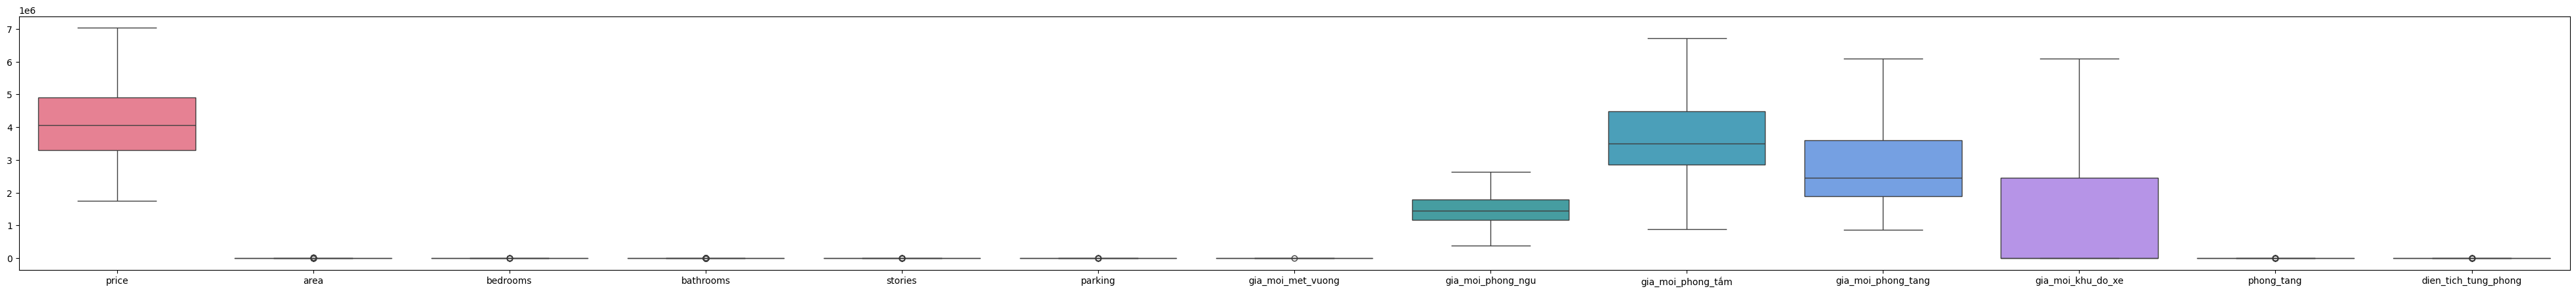

In [ ]:
plt.figure(figsize=(50,5))
sns.boxplot(data=df)
plt.show()

In [ ]:
df = df.select_dtypes(include=[np.number])
#Reset lại index do sự thay đổi của việc xóa giá trị trùng, giá trị ngoại lai....
df = df.reset_index(drop=True)
df = df.fillna(0) #thay thế các giá trị nan/null thành 0

In [ ]:
col2 = ['bedrooms','bathrooms','parking','stories']

for i in col2:
  df = df.drop(columns=i)

In [ ]:
X = df.drop(columns = ["price"]) #biến độc lập
y = df["price"] #biến phụ thuộc

# Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler
chuan_hoa_du_lieu = StandardScaler()
X_da_chuan_hoa = chuan_hoa_du_lieu.fit_transform(X)

# Chia tập dữ liệu ra 2 tập Train (80%) và Test (20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_da_chuan_hoa,y,test_size = 0.2,random_state= 42)

# Huấn luyện cho mô hình với các tập train và sử dụng dữ liệu X_test để dự đoán y_pred_sklearn

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_sklearn = model.predict(X_test)

# Đánh giá mô hình

In [ ]:
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

In [ ]:
print("Scikit-learn Linear Regression:")
print(f"MAE: {mae_sklearn}")
print(f"MSE: {mse_sklearn}")
print(f"R² Score: {r2_sklearn}")

Scikit-learn Linear Regression:
MAE: 147146.6504780423
MSE: 43072325027.98053
R² Score: 0.9744027259917966
